# Learning beautiful data visualization
This notebook is to practice advanced data visualization using matplotlib. It will follow the book *"Scientific Visualization: Python + Matplotlib"*

Source: https://inria.hal.science/hal-03427242v1/document

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import numpy as np

# mpl.rcParams["font.serif"] = "Source Serif Pro"
# mpl.rcParams["font.size"] = 10
# mpl.rcParams["font.weight"] = 400
# mpl.rcParams["font.family"] = "serif"
# mpl.rcParams["axes.labelweight"] = 400

# Chapter 1: Fundamentals

## Anatomy of a figure

### Excercise 1
Produce a figure of 512x512 pixels

In [ ]:
fig = plt.figure(figsize=(5, 5))
# plt.savefig("512.png", dpi = 512/5)
# 5x5 inches with 512/5 dots per inches

<Figure size 500x500 with 0 Axes>

### Excersise 2
Create a ruler with both cm and inches

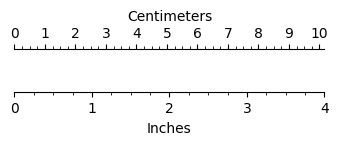

In [2]:
inch = 2.54
fig = plt.figure(figsize = (4, 1))
ax1 = plt.subplot(1, 1, 1, yticks=[])
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(0, 4)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.25))
ax1.set_xlabel("Inches")
ax1.spines["bottom"].set_position(("axes", 0.45))

ax2 = ax1.twiny()
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.set_xlim(0, 4*inch)
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.set_xlabel("Centimeters")
ax2.spines["bottom"].set_position(("axes", 0.55))


Main lessons: how to customize spines, learnt about MultipleLocator and twiny

### Exercise 3
Recreate figure 1.10

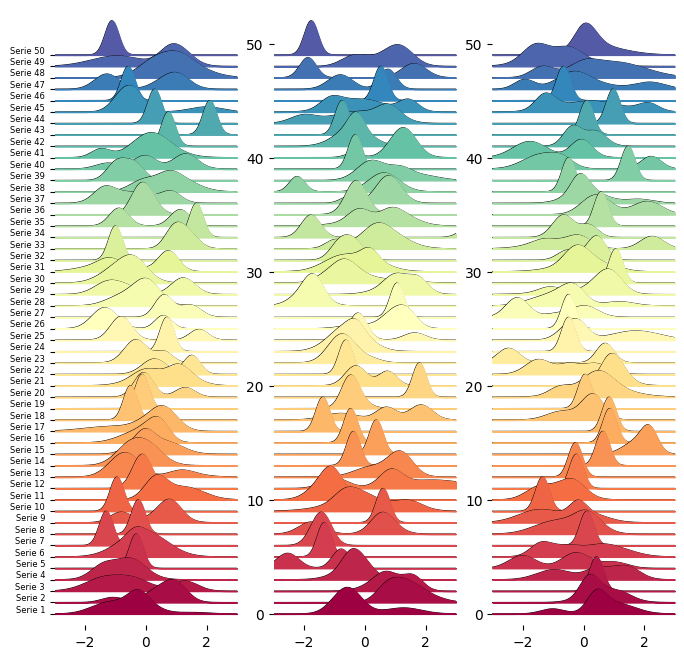

In [43]:
# Some nice but random curves
def curve():
    n = np.random.randint(1, 5)
    centers = np.random.normal(0.0, 1.0, n)
    widths = np.random.uniform(5.0, 50.0, n)
    widths = 10 * widths / widths.sum()
    scales = np.random.uniform(0.1, 1.0, n)
    scales /= scales.sum()
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    for center, width, scale in zip(centers, widths, scales):
        X = X + scale * np.exp(-(x - center) * (x - center) * width)
    return X

cmap = mpl.colormaps["Spectral"]

fig = plt.figure(figsize=(8,8))
ax = None
for n in range(3):
    ax = plt.subplot(1, 3, n+1, frameon=False, sharex=ax)
    for i in range(50):
        Y = curve()
        X = np.linspace(-3, 3, len(Y))
        ax.plot(X, 3*Y+i, color = "k", linewidth = 0.75, zorder = 100 - i)
        color = cmap(i/50)
        ax.fill_between(X, 3*Y+i, i, color=color, zorder = 100-i)
    ax.set_ylim(-1, 53)
    ax.set_xlim(-3, 3)
    if n == 0:
        ax.set_yticks(np.arange(50))
        ax.set_yticklabels(["Serie %d" % i for i in range(1, 51)])
        ax.yaxis.set_tick_params(labelleft=True)
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(6)
            tick.label1.set_verticalalignment("bottom")
    

Main lessons: subplot positioning, vertically stacking graphs by adding i (clever), using zorder

## Coordinate system

In every matplotlib plot you have figure coordinates and data coordinates and their normalized counterpart (0, 1)

### Exercise 1
Plot circles

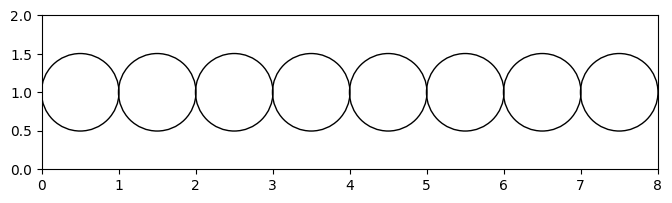

In [62]:
fig = plt.figure(figsize=(8,2))

ax = plt.subplot(1, 1, 1, aspect = 1, xlim = [0, 8], ylim = [0, 2])
point = fig.dpi/72
X = 0.5 + np.arange(8) 
Y = [1]*len(X)
DC_to_PT = lambda x: x * ax.get_window_extent().width / (8 - 0) / point
S = DC_to_PT(1) ** 2
plt.scatter(X, Y, s=S, facecolor="none", edgecolor="black", linewidth=1)


## Scales and projection

### Excercise 1

/tmp/ipykernel_140597/431519817.py:4: RuntimeWarning: divide by zero encountered in log
  f3 = np.log(x)
/tmp/ipykernel_140597/431519817.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2 = plt.subplot(2, 2, 2, xlim=(0, 100), ylim=(0, 10), xscale = "log")
/tmp/ipykernel_140597/431519817.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3 = plt.subplot(2, 2, 3, xlim=(0, 10), ylim=(0, 100), yscale = "log")
/tmp/ipykernel_140597/431519817.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax4 = plt.subplot(2, 2, 4, xlim=(0, 100), ylim=(0, 100), xscale = "log", yscale = "log")
/tmp/ipykernel_140597/431519817.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax4 = plt.subplot(2, 2, 4, xlim=(0, 100), ylim=(0, 100), xscale = "log", yscale = "log")


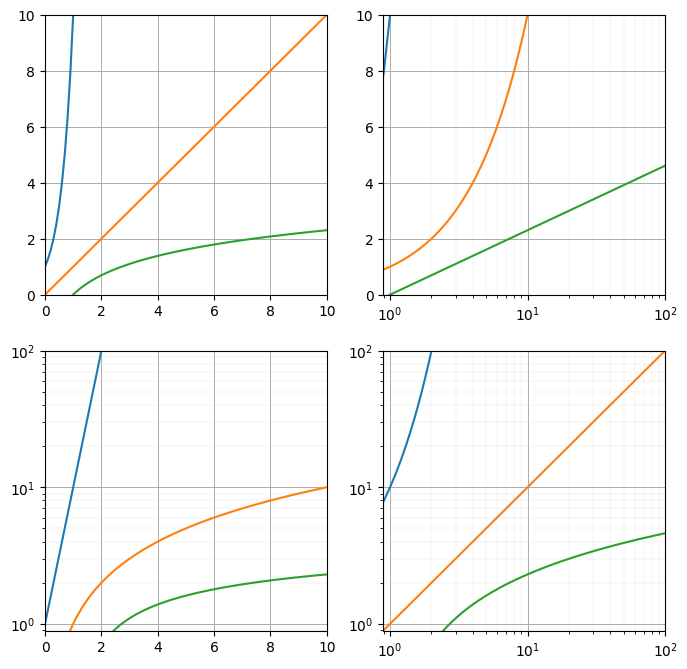

In [100]:
x = np.linspace(0, 100, 1000)
f1 = 10**x
f2 = x
f3 = np.log(x)
functions = [f1, f2, f3]

fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1, xlim=(0, 10), ylim=(0, 10))
for f in functions:
    ax1.plot(x, f)

ax2 = plt.subplot(2, 2, 2, xlim=(0, 100), ylim=(0, 10), xscale = "log")
for f in functions:
    ax2.plot(x, f)

ax3 = plt.subplot(2, 2, 3, xlim=(0, 10), ylim=(0, 100), yscale = "log")
for f in functions:
    ax3.plot(x, f)

ax4 = plt.subplot(2, 2, 4, xlim=(0, 100), ylim=(0, 100), xscale = "log", yscale = "log")
for f in functions:
    ax4.plot(x, f)

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, "major", color = "0.65", linewidth = 0.65, zorder = -10)
    ax.grid(True, "minor", color = "0.85", linewidth = 0.2, zorder = -10)


## Elements of typography

### Exercise

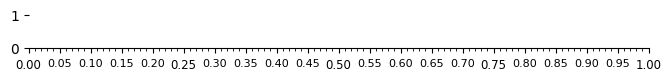

In [138]:
fig = plt.figure(figsize = (8, 2))
ax=plt.subplot(4, 1, 1, xlim=[0,1], ylim=[0,1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis='both', which= "major")
for i, label in enumerate(ax.get_xticklabels()):
    if i in [1, 6, 11, 16, 21]:
        label.set_size(8.5)
    else:
        label.set_size(8)

## Color

Quantitative data:
    - (0, 1) -> Sequential color
    - (-1, 1) -> Diverging color
    - (0, 2*pi) -> Cyclic color

Qualitative data -> Qualitative color

# Chapter 2:  Figure Design

## 10 Simple rules

### Rule 1: Know your audience
Adapt the plots to your audience, are they experts, students, etc...
### Rule 2: Identify your message
What do you wanna show with this plot? A figure is meant to express something, how can you best express that?
### Rule 3: Adapt the figure to the Support Medium
Oral presentation? Better be quick to understand. Poster that is supposed to be seen from far away? Think of font size. Etc...
### Rule 4: Captions are not optional
### Rule 5: Do not trust the defaults
### Rule 6: Use color effectively
### Rule 7: Do not mislead readers
Think of the differences showing only the top part of the graph -> Very dishonest
### Rule 8: Avoid "chartjunk"
Avoid ANYTHING that is not necessary, do not use too many colors, too many lines, too many anything! Put in a graph the minimum amount of information to make it speak
### Rule 9: Message trumps beauty
### Rule 10: Get the right tool

## Mastering the defaults
We can change the default settings to apply a stylesheet to all of our plots, ensuring consistent styling. Look at the *style.mplstyle* file

[]

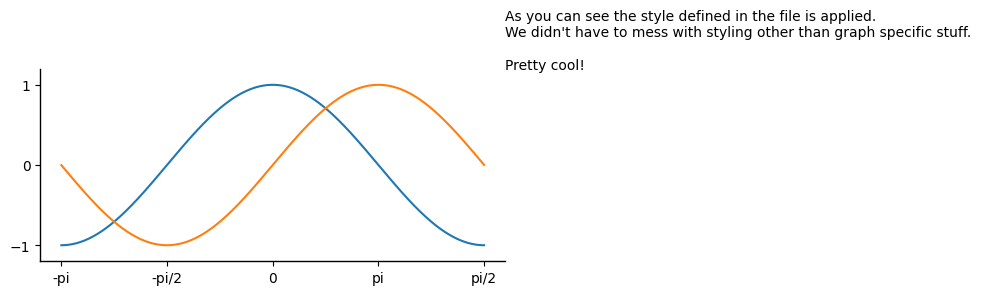

In [40]:
plt.style.use("./style.mplstyle")
fig = plt.figure()
X = np.linspace(-3.14, 3.14, 500)
C = np.cos(X)
S = np.sin(X)
ax = plt.subplot()
ax.plot(X, C)
ax.plot(X, S)
ax.set_yticks([-1, 0, 1])
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi, np.pi/2,])
ax.set_xticklabels(["-pi", "-pi/2", "0", "pi/2", "pi"])
ax.text(ax.get_xlim()[1], ax.get_ylim()[1], 
        r"As you can see the style defined in the file is applied." \
"\nWe didn't have to mess with styling other than graph specific stuff." \
"\n\nPretty cool!")
plt.plot()

## Size, aspect, and layout

### Size and ratio

((0.0, 1.0), (0.0, 1.0))

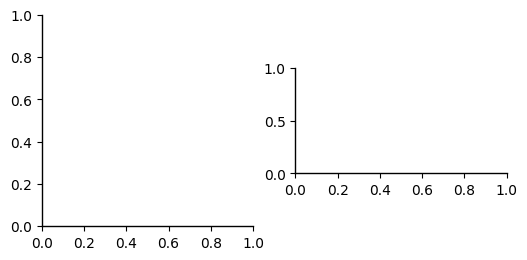

In [44]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1, 2, 1, aspect = 1)
ax1.set_xlim(0, 1), ax1.set_ylim(0,1)
ax2 = plt.subplot(1, 2, 2, aspect = 0.5)
ax2.set_xlim(0, 1), ax2.set_ylim(0,1)

Same axis, diffenrent aspect ratio

### Subplots organization

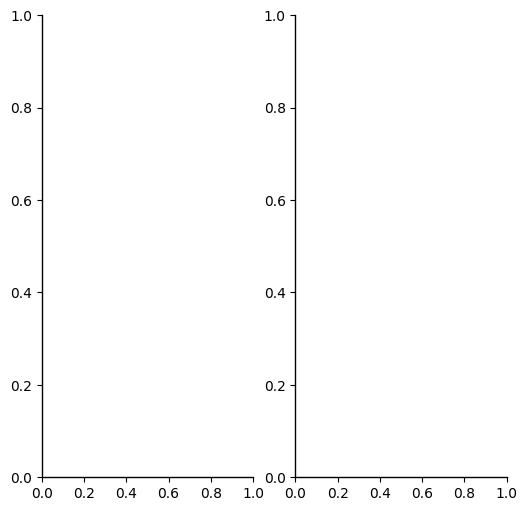

In [51]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Look more into gridspec, looks interesting

## Ornaments

### Legends

Text(-50, 100, 'Cosine')

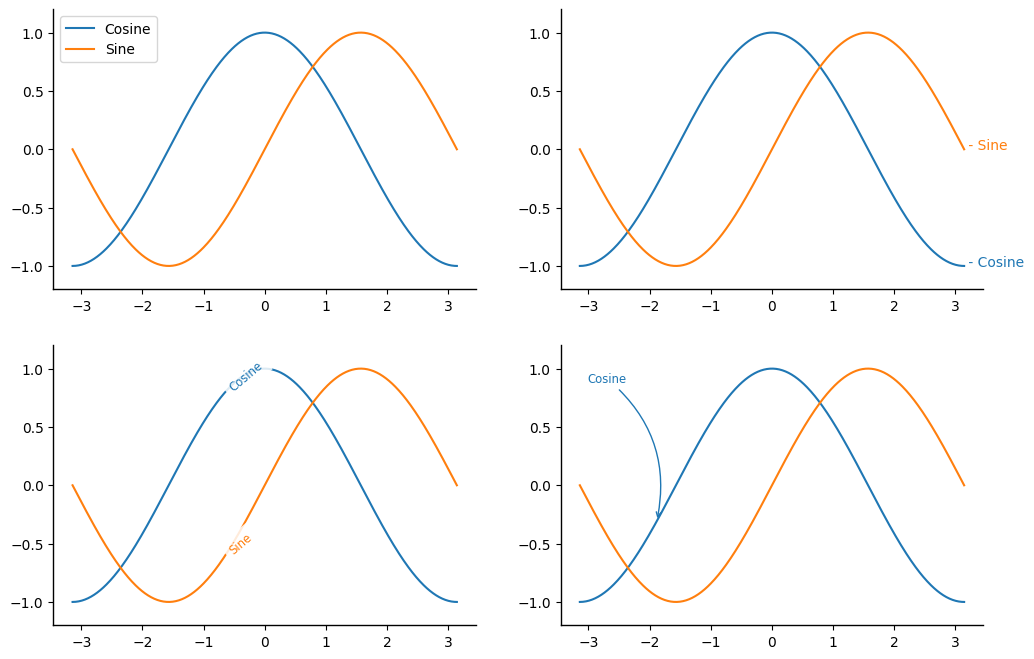

In [89]:
fig = plt.figure(figsize = (12, 8))

X = np.linspace(-np.pi, np.pi, 500, endpoint=True)

C, S = np.cos(X), np.sin(X)

def plot(ax):
    plot1 = ax.plot(X, C, label = "Cosine", clip_on = False)
    plot2 = ax.plot(X, S, label = "Sine", clip_on = False)
    return plot1, plot2

ax1 = plt.subplot(2, 2, 1)
plot(ax1)
ax1.legend()

ax2 = plt.subplot(2, 2, 2)
plot1, plot2 = plot(ax2)
ax2.text(X[-1], C[-1], " - " + plot1[0].get_label(), color = plot1[0].get_color())
ax2.text(X[-1], S[-1], " - " + plot2[0].get_label(), color = plot2[0].get_color())

ax3 = plt.subplot(2, 2, 3)
plot1, plot2 = plot(ax3)
ax3.text(X[200], C[200], plot1[0].get_label(), size = "small", bbox = dict(facecolor = "white", edgecolor = "None", alpha = 0.85), color = plot1[0].get_color(), rotation = 40)
ax3.text(X[200], S[200], plot2[0].get_label(), size = "small", bbox = dict(facecolor = "white", edgecolor = "None", alpha = 0.85), color = plot2[0].get_color(), rotation = 40)

ax4 = plt.subplot(2, 2, 4)
plot1, plot2 = plot(ax4)
ax4.annotate("Cosine", (X[100], C[100]),
            size = "small", color = plot1[0].get_color(), 
            xytext=(-50, 100), textcoords = "offset points",
            arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=-0.3", color = plot1[0].get_color()))

### Annotations are difficult